In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



2023-04-27 12:16:30.809756: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 12:16:30.852161: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 12:16:30.852838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 12:16:31.566902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.now()
df = yf.download('RELIANCE.NS', start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['normalized_price'] = df['Close'] / df['Close'].max()
train_data = df.iloc[:int(0.8*len(df)), :]
test_data = df.iloc[int(0.8*len(df)):, :]

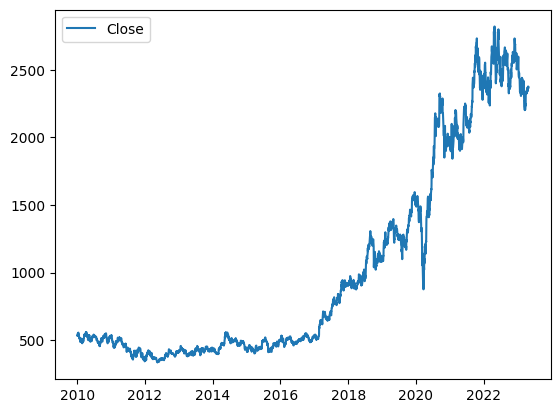

In [4]:
plt.plot(df.index, df['Close'])
plt.legend(['Close'])
plt.show()

In [5]:
dt_model = DecisionTreeRegressor()
dt_model.fit(train_data[['normalized_price']], train_data['Close'])
predictions_dt = dt_model.predict(test_data[['normalized_price']])
predictions_dt

array([2127.60009766, 2110.60009766, 2080.69995117, 2082.10009766,
       2108.85009766, 2156.19995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2177.69995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2177.69995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2177.69995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2177.69995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2177.69995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2177.69995117, 2177.69995117, 2177.69995117,
       2177.69995117, 2156.19995117, 2126.44995117, 2108.85009766,
       2113.80004883, 2009.        , 2057.80004883, 2009.        ,
       2009.        , 2057.80004883, 1878.05004883, 1851.80004883,
       1911.69995117, 1971.55004883, 2009.        , 2057.80004883,
       2082.10009766, 2004.        , 1971.55004883, 2004.        ,
       2004.        , 2004.        , 1971.55004883, 1971.55004883,
       1911.69995117, 1935.        , 1971.55004883, 1935.     

In [6]:
train_X, train_y = train_data[['normalized_price']].values, train_data['Close'].values
test_X, test_y = test_data[['normalized_price']].values, test_data['Close'].values

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mae', optimizer='adam')
lstm_model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

predictions_lstm = lstm_model.predict(test_X)
predictions_lstm

2023-04-27 12:16:33.753006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-27 12:16:33.754746: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-27 12:16:34.021499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

Epoch 1/50


2023-04-27 12:16:34.539046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 12:16:34.541726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 12:16:34.543717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

37/37 - 4s - loss: 684.8458 - val_loss: 2328.6365 - 4s/epoch - 107ms/step
Epoch 2/50
37/37 - 0s - loss: 684.4097 - val_loss: 2327.4236 - 226ms/epoch - 6ms/step
Epoch 3/50
37/37 - 0s - loss: 682.8397 - val_loss: 2323.4646 - 186ms/epoch - 5ms/step
Epoch 4/50
37/37 - 0s - loss: 678.9125 - val_loss: 2317.3435 - 210ms/epoch - 6ms/step
Epoch 5/50
37/37 - 0s - loss: 673.4646 - val_loss: 2312.3718 - 186ms/epoch - 5ms/step
Epoch 6/50
37/37 - 0s - loss: 668.6719 - val_loss: 2308.9690 - 229ms/epoch - 6ms/step
Epoch 7/50
37/37 - 0s - loss: 665.0425 - val_loss: 2306.3384 - 224ms/epoch - 6ms/step
Epoch 8/50
37/37 - 0s - loss: 662.1769 - val_loss: 2304.0605 - 184ms/epoch - 5ms/step
Epoch 9/50
37/37 - 0s - loss: 659.7372 - val_loss: 2301.9749 - 204ms/epoch - 6ms/step
Epoch 10/50
37/37 - 0s - loss: 657.5451 - val_loss: 2300.0105 - 193ms/epoch - 5ms/step
Epoch 11/50
37/37 - 0s - loss: 655.5093 - val_loss: 2298.1296 - 206ms/epoch - 6ms/step
Epoch 12/50
37/37 - 0s - loss: 653.5795 - val_loss: 2296.3103 - 

2023-04-27 12:16:48.647518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 12:16:48.648597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 12:16:48.649967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 1s 3ms/step


array([[91.47548 ],
       [91.475464],
       [91.47544 ],
       [91.47545 ],
       [91.47546 ],
       [91.47549 ],
       [91.475555],
       [91.475555],
       [91.475555],
       [91.475555],
       [91.475555],
       [91.475555],
       [91.475555],
       [91.47554 ],
       [91.47551 ],
       [91.475525],
       [91.475494],
       [91.47551 ],
       [91.47552 ],
       [91.475525],
       [91.475525],
       [91.475525],
       [91.47551 ],
       [91.47551 ],
       [91.47554 ],
       [91.475525],
       [91.475525],
       [91.475525],
       [91.47554 ],
       [91.47555 ],
       [91.47551 ],
       [91.475494],
       [91.475494],
       [91.47548 ],
       [91.475464],
       [91.47546 ],
       [91.475464],
       [91.475395],
       [91.4754  ],
       [91.47538 ],
       [91.475395],
       [91.475426],
       [91.47527 ],
       [91.47523 ],
       [91.4753  ],
       [91.475334],
       [91.475395],
       [91.47542 ],
       [91.47545 ],
       [91.47538 ],


In [7]:
dt_rmse = np.sqrt(((predictions_dt - test_data['Close']) ** 2).mean())
lstm_rmse = np.sqrt(((predictions_lstm - test_y) ** 2).mean())
print("Decision Tree RMSE:", dt_rmse)
print("LSTM RMSE:", lstm_rmse)

Decision Tree RMSE: 265.7939828285829
LSTM RMSE: 2250.145075444731
